O objetivo desta análise é fazer inferências preliminares no dataset.
O dataset é obtido pela url 'https://www.kaggle.com/koki25ando/salary'

"Context
The dataset was scraped from Basketball Reference

This dataset is so simple that only includes information about player names, teams and salary amount. I am hoping to see interesting analysis using not only this dataset but also other external datasets.

I really appreciate any contributions from you!

Content
Player: Player name
Tm: Team name each player belongs to at the beginning of the 2017-
2018 season
seson17_18: Salary price for 2017-2018 season (USD)
Acknowledgements
Original data was collected by NBA.

Inspiration
Who gets the most amount of salary?
Any other interesting datasets to combine to do nice analysis?"
    

In [1]:
#importando as bibilotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import seaborn as sns

In [3]:
#importando o dataset

df=pd.read_csv('NBA_season1718_salary.csv', sep=',', encoding='latin1')
df.head()

,Unnamed: 0,Player,Tm,season17_18
0,1,Stephen Curry,GSW,34682550.0
1,2,LeBron James,CLE,33285709.0
2,3,Paul Millsap,DEN,31269231.0
3,4,Gordon Hayward,BOS,29727900.0
4,5,Blake Griffin,DET,29512900.0


In [4]:
#realizando as análises iniciais no df
#verificando a quantiodade de NULLS e o tipo das variáveis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573 entries, 0 to 572
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   573 non-null    int64  
 1   Player       573 non-null    object 
 2   Tm           573 non-null    object 
 3   season17_18  573 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 18.0+ KB


In [5]:
#análise descritiva das variáveis numéricas
df.describe()

,Unnamed: 0,season17_18
count,573.000000,5.730000e+02
mean,287.000000,5.858946e+06
std,165.555127,7.162373e+06
min,1.000000,1.722400e+04
25%,144.000000,1.312611e+06
50%,287.000000,2.386864e+06
75%,430.000000,7.936509e+06
max,573.000000,3.468255e+07


In [6]:
#trocando o nome das colunas e dando drop naquelas colunas sem importância

df=df.drop('Unnamed: 0', axis=1)

In [7]:
df

,Player,Tm,season17_18
0,Stephen Curry,GSW,34682550.0
1,LeBron James,CLE,33285709.0
2,Paul Millsap,DEN,31269231.0
3,Gordon Hayward,BOS,29727900.0
4,Blake Griffin,DET,29512900.0
...,...,...,...
568,Quinn Cook,NOP,25000.0
569,Chris Johnson,HOU,25000.0
570,Beno Udrih,DET,25000.0
571,Joel Bolomboy,MIL,22248.0


In [8]:
#trocando o nome das outras colunas
df.rename(columns={'Player':'player',
                     'Tm':'team',
                     'season17_18':'salary'}, inplace=True)
df.head()

,player,team,salary
0,Stephen Curry,GSW,34682550.0
1,LeBron James,CLE,33285709.0
2,Paul Millsap,DEN,31269231.0
3,Gordon Hayward,BOS,29727900.0
4,Blake Griffin,DET,29512900.0


In [9]:
#contagem dos jogadores na temporada
df['player'].nunique()

535

In [10]:
#Contagem dos jogadores por contrato
df['player'].value_counts()

Jarell Eddie         3
Demetrius Jackson    3
Nigel Hayes          3
Sean Kilpatrick      3
Isaiah Canaan        3
                    ..
Malcolm Delaney      1
Dwight Buycks        1
Doug McDermott       1
John Collins         1
Al Horford           1
Name: player, Length: 535, dtype: int64

In [13]:
#analisando a média de salário
round(df['salary'].mean(),2)

5858945.89

In [57]:
#verificando a média de salário por jogador
round(df['salary'].mean()/df['player'].nunique(),2)

10951.3

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


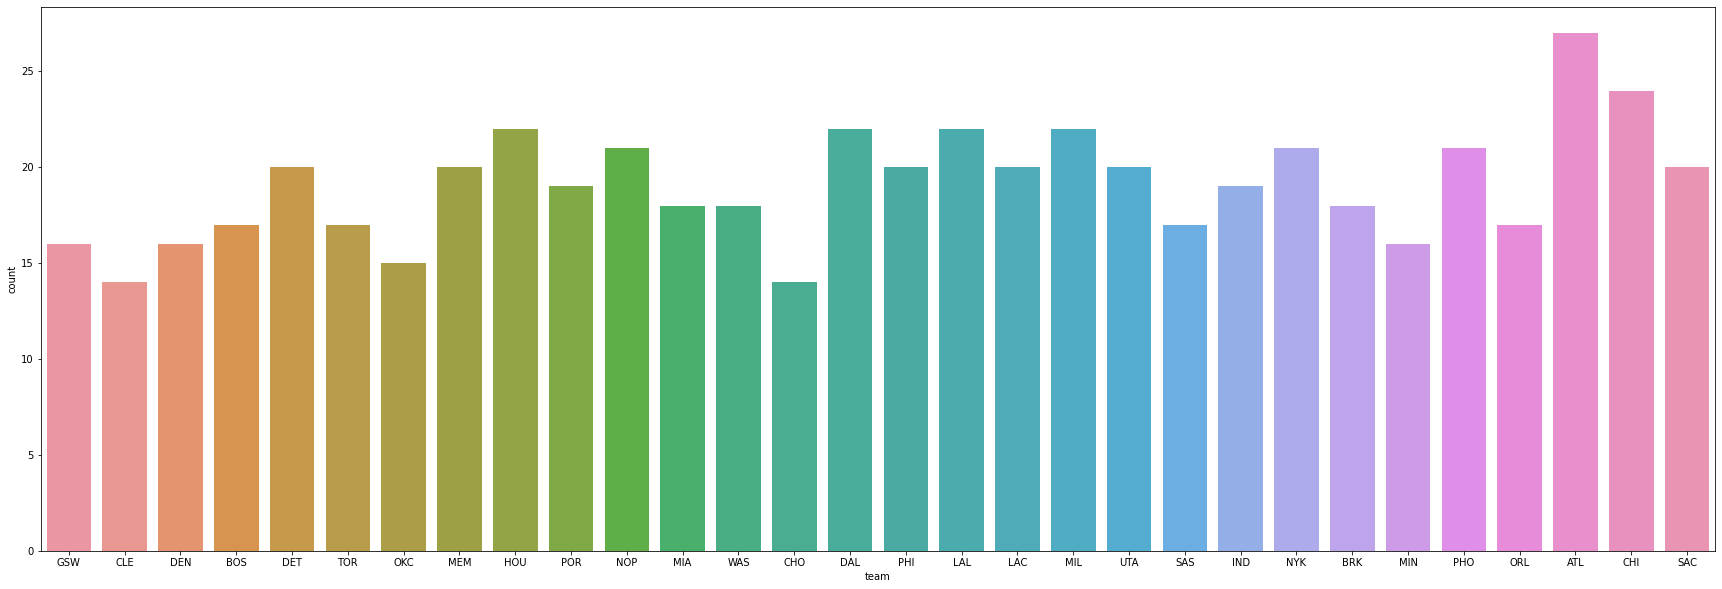

In [15]:
#visualização do número de contratos por time
plt.figure(figsize=(30,10))
sns.countplot(df.team)
plt.show();


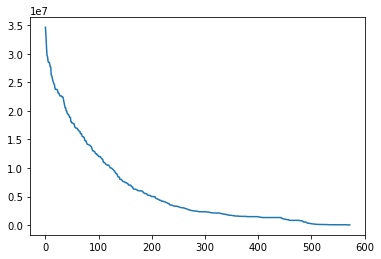

In [16]:
#verificando graficamente os dados de salarios

plt.plot(df.salary);

<AxesSubplot:ylabel='Frequency'>

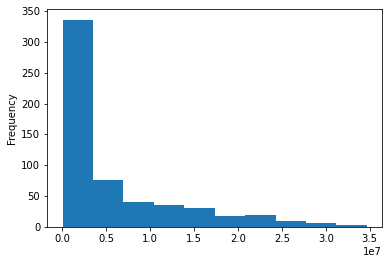

In [17]:
df.salary.plot.hist()

In [18]:
#verificando se os dados pertencem a uma distribuição normal
stats.shapiro(df.salary)

ShapiroResult(statistic=0.7648022770881653, pvalue=8.13994194698768e-28)

In [19]:
#verificou-se que pelo p-valeu ser menor que 0,05 ou 5%, rejeita-se h0.
#Assim os dados não pertencem a uma distriuição normal
#sendo neces´sário realizar trasnformações nas variáveis

In [20]:
#realizando a transformação de boxcox
salary_boxcox=stats.boxcox(df.salary)
salary_boxcox

(array([156.03176745, 154.71333358, 152.72968727, 151.14323168,
        150.91673792, 150.0522685 , 149.8648225 , 149.8648225 ,
        149.61302135, 148.99689417, 148.99070981, 147.29873849,
        147.19332602, 146.64663552, 146.17465847, 145.82710624,
        145.55252749, 145.34075814, 144.55410936, 144.31989077,
        144.31989077, 144.31989077, 144.31989077, 143.97224236,
        143.47707621, 143.47707621, 143.33289864, 142.8687201 ,
        142.8687201 , 142.8687201 , 142.8687201 , 142.64544677,
        142.64544677, 142.59663147, 141.98630287, 141.29260684,
        140.65867046, 140.0527496 , 140.0425887 , 139.33326593,
        139.24434144, 138.63113819, 138.52903186, 138.26846274,
        138.22185173, 137.77225706, 137.57428387, 137.57428387,
        136.33687438, 136.33687438, 136.05460474, 136.05460474,
        135.96296069, 135.86612408, 135.83581331, 134.94226623,
        134.84631982, 134.63229612, 134.63155695, 134.63155695,
        134.48359469, 134.13209825, 134.

In [21]:
#verificando o tipo da variável
type(salary_boxcox)

tuple

In [22]:
#inserindo os elementos da tupla em uma lista
salary_boxcox_2=[]
for i in salary_boxcox[0]:
    print(i)
    salary_boxcox_2.append(i)

156.03176745235925
154.71333358413827
152.7296872651961
151.1432316802979
150.91673791674967
150.05226850172056
149.86482249992397
149.86482249992397
149.61302135067666
148.99689417189597
148.99070981134764
147.29873849063364
147.19332602349562
146.64663552015367
146.17465847472695
145.82710624425835
145.55252749103065
145.34075814077215
144.55410936452571
144.31989077073484
144.31989077073484
144.31989077073484
144.31989077073484
143.97224235577477
143.4770762121951
143.4770762121951
143.3328986387498
142.8687200972878
142.8687200972878
142.8687200972878
142.8687200972878
142.6454467695865
142.6454467695865
142.5966314651469
141.9863028680433
141.29260683677887
140.65867046433078
140.05274960403136
140.04258869993896
139.3332659302271
139.24434143559844
138.63113819150618
138.52903186037202
138.26846273696256
138.22185173075604
137.77225705956943
137.57428386775695
137.57428386775695
136.33687438263763
136.33687438263763
136.05460474318417
136.05460474318417
135.9629606948744
135.8661

In [23]:
#verificando o números de elementos da nova lista e a soma
print(len(salary_boxcox_2),sum(salary_boxcox_2))

573 53428.20823476067


In [24]:
#inserindo esta lista no dataframe
df['salary_boxcox']=salary_boxcox_2
df.head()

,player,team,salary,salary_boxcox
0,Stephen Curry,GSW,34682550.0,156.031767
1,LeBron James,CLE,33285709.0,154.713334
2,Paul Millsap,DEN,31269231.0,152.729687
3,Gordon Hayward,BOS,29727900.0,151.143232
4,Blake Griffin,DET,29512900.0,150.916738


In [25]:
#fazendo o tste de normalidade para a nova variável
stats.shapiro(df.salary_boxcox)

ShapiroResult(statistic=0.9710975289344788, pvalue=3.352493394004341e-09)

Como o p-value é menor que 5%, a variável salary_boxcox não representa uma normal
Como o objetivo é apenas fazer análises preliminares do dataset, continua-se utilizando os pressupostos de normalidade

Fazendo a padronização da nova variável utilizando a relação para o Z_score
![](https://www.gstatic.com/education/formulas2/397133473/en/z_score.svg)


In [26]:
df['salary_boxcox_z']=(df.salary_boxcox - df.salary_boxcox.mean())/df.salary_boxcox.std()

In [27]:
df.head()

,player,team,salary,salary_boxcox,salary_boxcox_z
0,Stephen Curry,GSW,34682550.0,156.031767,2.106665
1,LeBron James,CLE,33285709.0,154.713334,2.062430
2,Paul Millsap,DEN,31269231.0,152.729687,1.995875
3,Gordon Hayward,BOS,29727900.0,151.143232,1.942647
4,Blake Griffin,DET,29512900.0,150.916738,1.935048


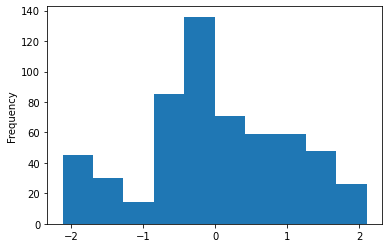

In [28]:
df.salary_boxcox_z.plot.hist();

In [29]:
#Realizando o teste de normalidade para a variável com z score
stats.shapiro(df.salary_boxcox_z)

ShapiroResult(statistic=0.9710975289344788, pvalue=3.3525124898403647e-09)

In [29]:
# Calculando a média amostral, desvio padrão amostral, intervalos de confiança e limite inferior e superior
m_am=df.salary_boxcox_z.mean()
desv_am=df.salary_boxcox_z.std()
ic=scipy.stats.norm.interval(alpha=0.95, loc=m_am, scale=desv_am)
lim_inf=scipy.stats.norm.interval(alpha=0.95, loc=m_am, scale=desv_am)[0]
lim_sup=scipy.stats.norm.interval(alpha=0.95, loc=m_am, scale=desv_am)[1]

In [30]:
# Verificando jogadores que ganham acima do limite superior
df[df.salary_boxcox_z>lim_sup]

,player,team,salary,salary_boxcox,salary_boxcox_z
0,Stephen Curry,GSW,34682550.0,156.031767,2.106665
1,LeBron James,CLE,33285709.0,154.713334,2.062430
2,Paul Millsap,DEN,31269231.0,152.729687,1.995875


3 Jogadores ganham acima da média com grau de confiança de 95%

In [31]:
# Verificando jogadores que ganham abaixo do limite inferior
df[df.salary_boxcox_z<lim_inf]

,player,team,salary,salary_boxcox,salary_boxcox_z
566,DeAndre Liggins,ATL,26773.0,33.412427,-2.007409
567,Axel Toupane,NOP,25000.0,32.889661,-2.024949
568,Quinn Cook,NOP,25000.0,32.889661,-2.024949
569,Chris Johnson,HOU,25000.0,32.889661,-2.024949
570,Beno Udrih,DET,25000.0,32.889661,-2.024949
571,Joel Bolomboy,MIL,22248.0,32.016177,-2.054256
572,Jarell Eddie,CHI,17224.0,30.169128,-2.116227


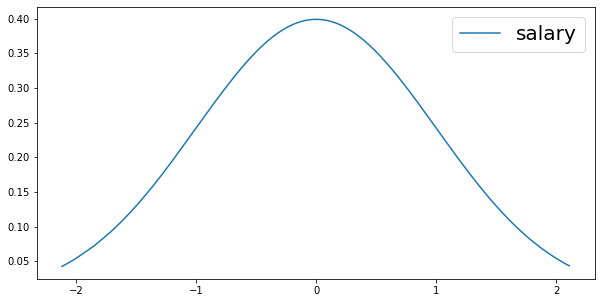

In [32]:
#plotando a nova variável salary_boxcox_z

fig, ax = plt.subplots(1,1,figsize=(10,5))
x = df.salary_boxcox_z
m_am=df.salary_boxcox_z.mean()
desv_am=df.salary_boxcox_z.std()


# plotando o gráfico com os valores de x e os valores normais da densidade de probabilidade
ax.plot(x, stats.norm.pdf(x=x, loc=m_am, scale=desv_am), label='salary')
# imprimindo a legenda
ax.legend(loc='best', frameon=True, fontsize=20)
# mostrando o gráfico
plt.show()


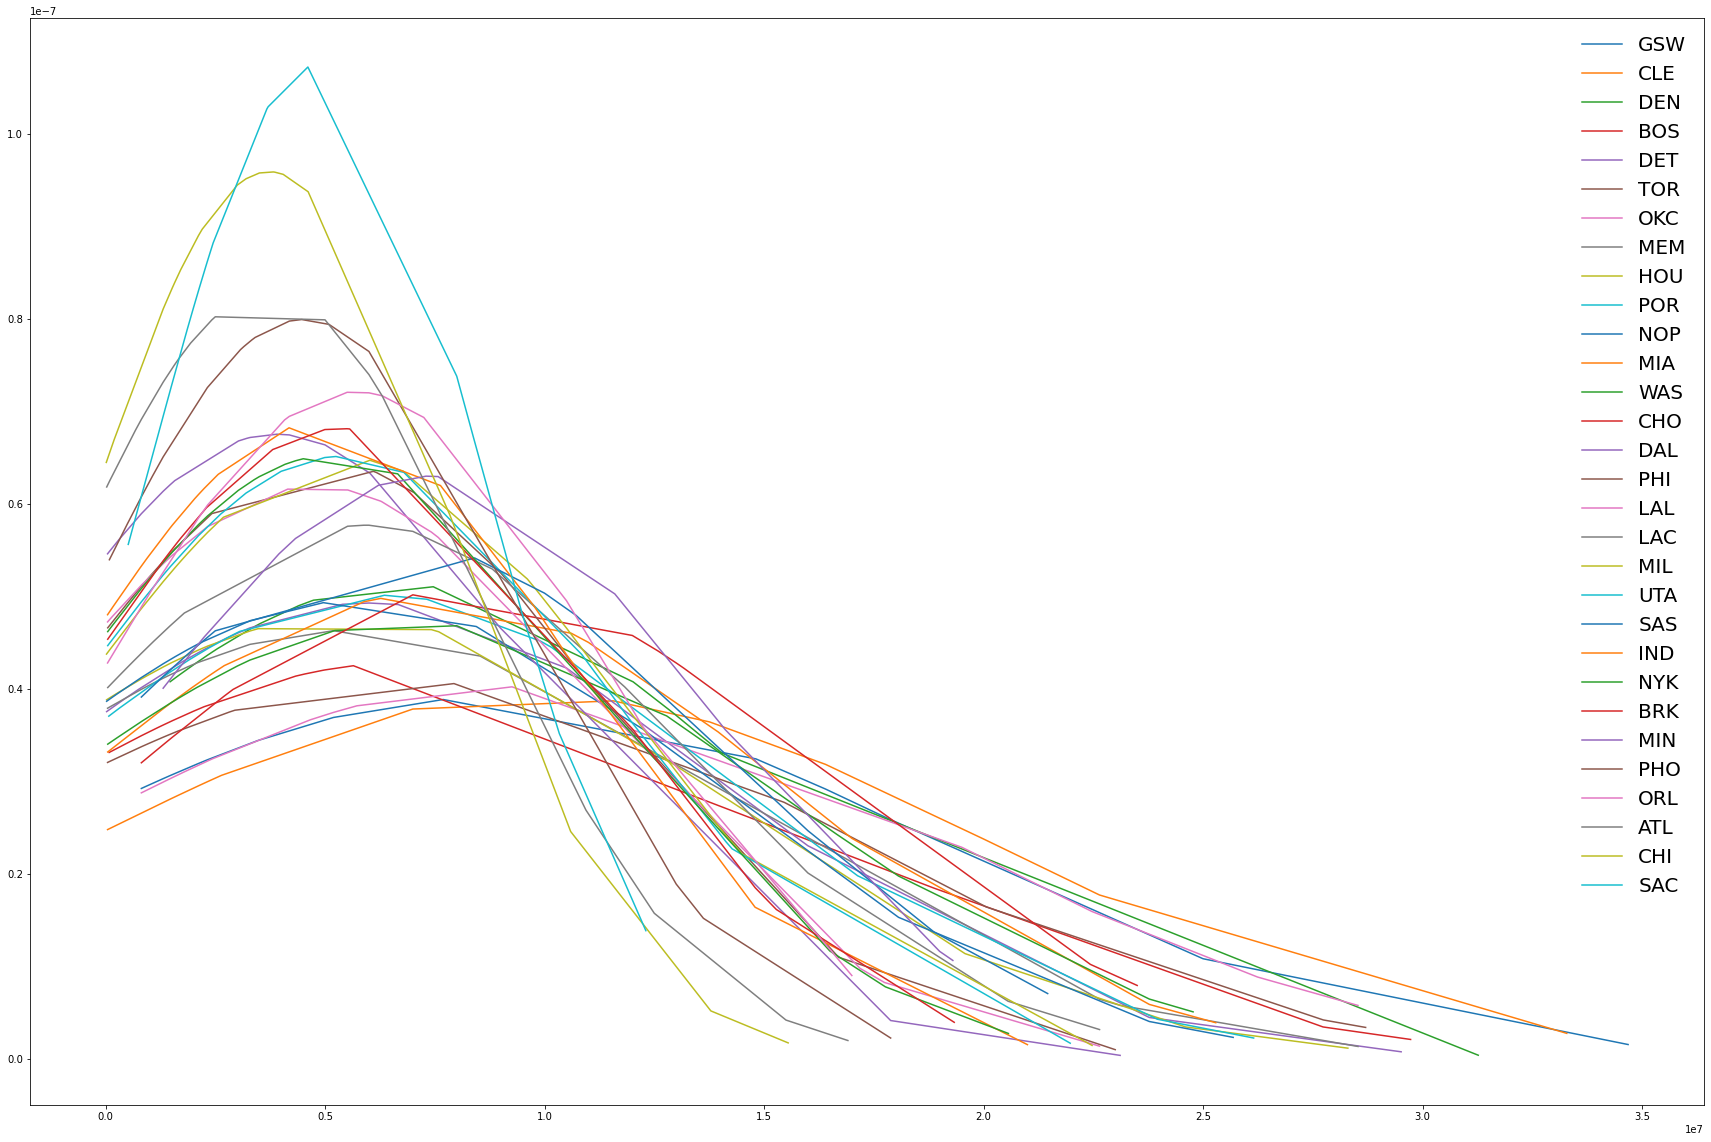

In [55]:
#plotando a nova variável salary_boxcox_z para cada time
# definindo a figura para o gráfico
fig, ax = plt.subplots(1, 1,figsize=(30,20))

# fezendo uma função para plotar a disbribuições para todos os times
for i in df.team.unique():
    x = df[df.team == i]['salary']
    mu = df[df.team == i]['salary'].mean()
    sigma = df[df.team == i]['salary'].std()
    ax.plot(x, stats.norm.pdf(x, mu, sigma),label=i)
# plotando as legendas
ax.legend(loc='best', frameon=False,fontsize = 20)

In [62]:
df_gsw=df[df['team']=='GSW']

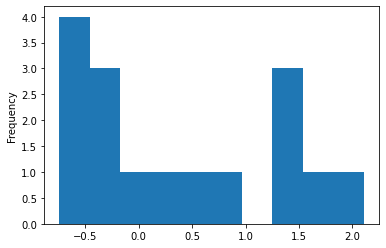

In [63]:
#plotando os dados
df_gsw.salary_boxcox_z.plot.hist();

In [64]:
#repetindo o teste de normalidade, verifica-se que os dados são normais para a variável salary_boxcox_z
stats.shapiro(df_gsw.salary_boxcox_z)

ShapiroResult(statistic=0.8941105008125305, pvalue=0.06472697108983994)

In [65]:
#analisando as estatísticas para o time do GSW

m_am_gsw=df_gsw.salary_boxcox_z.mean()
desv_am_gsw=df_gsw.salary_boxcox_z.std()

In [66]:
#utilização do teste t para comparar a média do dataset geral e do datatset para o time do GSW
stats.ttest_ind(df.salary_boxcox_z,df_gsw.salary_boxcox_z)

Ttest_indResult(statistic=-1.4212458229016784, pvalue=0.1557763289680534)

In [43]:
#Verifica-se que para o time do GSW e os outros, não existe diferença entra as médias salariais 

## t-test entre o GSW e todos os times

Realizando o teste T entre o GSW e todos os outros times da NBA

In [45]:
#retomando o dataset
df.head()

,player,team,salary,salary_boxcox,salary_boxcox_z
0,Stephen Curry,GSW,34682550.0,156.031767,2.106665
1,LeBron James,CLE,33285709.0,154.713334,2.062430
2,Paul Millsap,DEN,31269231.0,152.729687,1.995875
3,Gordon Hayward,BOS,29727900.0,151.143232,1.942647
4,Blake Griffin,DET,29512900.0,150.916738,1.935048


In [46]:
#filtrando o dataset para o GSW
df[df['team']=='GSW']

,player,team,salary,salary_boxcox,salary_boxcox_z
0,Stephen Curry,GSW,34682550.0,156.031767,2.106665
15,Kevin Durant,GSW,25000000.0,145.827106,1.764282
52,Klay Thompson,GSW,17826150.0,135.962961,1.433325
64,Draymond Green,GSW,16400000.0,133.631777,1.355110
74,Andre Iguodala,GSW,14814815.0,130.841947,1.261506
145,Shaun Livingston,GSW,7692308.0,114.154388,0.701612
196,Nick Young,GSW,5192000.0,105.145832,0.399361
238,Zaza Pachulia,GSW,3477600.0,96.662203,0.114722
298,David West,GSW,2328652.0,88.826812,-0.148168
320,JaVale McGee,GSW,2116955.0,87.055332,-0.207604


In [47]:
#fazendo o filtro para o tie do Cleveland Cavaliers
df[df['team']=='CLE']

,player,team,salary,salary_boxcox,salary_boxcox_z
1,LeBron James,CLE,33285709.0,154.713334,2.062430
28,Kevin Love,CLE,22642350.0,142.868720,1.665024
40,George Hill,CLE,20000000.0,139.244341,1.543420
65,Tristan Thompson,CLE,16400000.0,133.631777,1.355110
86,J.R. Smith,CLE,13760000.0,128.850129,1.194678
107,Jordan Clarkson,CLE,11562500.0,124.272616,1.041095
158,Kyle Korver,CLE,7000000.0,111.928101,0.626917
271,Cedi Osman,CLE,2642857.0,91.232109,-0.067467
286,Rodney Hood,CLE,2386864.0,89.291257,-0.132585
300,Jose Calderon,CLE,2328652.0,88.826812,-0.148168


In [48]:
#fazendo o teste t para os dois times
stats.ttest_ind(df[df['team']=='GSW'].salary_boxcox_z,df[df['team']=='CLE'].salary_boxcox_z)


Ttest_indResult(statistic=-0.24211005262172747, pvalue=0.8104594382666608)

In [49]:
#Verifica-se que os times não possuem diferenças salariais, ou seja, a média de salários de ambos os times são equivalentes

In [53]:
#aplicando a mesma lógica anterior para GSW e os outros times
team=[]
pvalues=[]
for i in df.team.unique():
    teamt_stats= stats.ttest_ind(a=df[df['team']=='GSW'].salary_boxcox_z,
                                 b=df[df['team']==i].salary_boxcox_z,
        equal_var=False)
    team.append(i)
    pvalues.append(teamt_stats[1])

    

inference=pd.DataFrame(list(zip(team,pvalues)),columns=['team', 'pvalues'])
inference.sort_values(by=['pvalues'],ascending=False)    

,team,pvalues
0,GSW,1.000000
2,DEN,0.907474
24,MIN,0.847050
1,CLE,0.812288
6,OKC,0.804196
13,CHO,0.781803
11,MIA,0.764979
20,SAS,0.713597
29,SAC,0.457362
3,BOS,0.435982


In [ ]:
#através da análise verifica que o time do Golden State Warriors possue média salarial estatisticamente diferente do
# Atlanta Hawks e do time do Dallas Mavericks